In [1]:
import pandas as pd
import numpy as np
noise_data = pd.read_csv(r"C:\Users\rladn\Desktop\project_2_2\noise_ (2).csv")
noise_data ['전세가율'] = 100 * noise_data ['면적당보증금'] /noise_data ['면적당매매금']
noise_data.head()

,Unnamed: 0,시군구,계약년월,면적당보증금,시,면적당매매금,전세가율
0,0,강원특별자치도 강릉시 견소동,201908,207.164427,강원특별자치도 강릉시,228.137412,90.806863
1,1,강원특별자치도 강릉시 견소동,201909,199.646793,강원특별자치도 강릉시,223.839083,89.192107
2,2,강원특별자치도 강릉시 견소동,201910,222.682534,강원특별자치도 강릉시,248.238090,89.705224
3,3,강원특별자치도 강릉시 견소동,201911,260.329239,강원특별자치도 강릉시,248.297844,104.845550
4,4,강원특별자치도 강릉시 견소동,201912,220.911840,강원특별자치도 강릉시,236.294295,93.490129


In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

# Data Preprocessing
# Select specific region for prediction
# Here, we are taking an example region for demonstration. You can select any region as per requirement.
selected_region_data = noise_data[noise_data['시군구'] == '강원특별자치도 강릉시 견소동']

# Using '면적당보증금' as target variable for prediction
values = selected_region_data['면적당보증금'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# Split data (90% training, 10% testing)
train_size = int(len(scaled) * 0.9)
train, test = scaled[:train_size, :], scaled[train_size:, :]

# Create dataset function
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Convert data to LSTM format
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM Model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(25))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# Training
early_stop = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1, shuffle=False, callbacks=[early_stop])

# Predict
y_pred = model.predict(X_test)

# Convert predictions back to normal values
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MAPE, MASE
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae = mean_absolute_error(y_test_original, y_pred_original)
mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100
mase = np.mean(np.abs((y_pred_original - y_test_original) / np.mean(y_test_original)))

rmse, mae, mape, mase


Epoch 1/100
2/2 [==============================] - 6s 1s/step - loss: 0.4406 - val_loss: 0.5742
Epoch 2/100
2/2 [==============================] - 0s 37ms/step - loss: 0.4349 - val_loss: 0.5675
Epoch 3/100
2/2 [==============================] - 0s 39ms/step - loss: 0.4284 - val_loss: 0.5605
Epoch 4/100
2/2 [==============================] - 0s 37ms/step - loss: 0.4224 - val_loss: 0.5533
Epoch 5/100
2/2 [==============================] - 0s 36ms/step - loss: 0.4156 - val_loss: 0.5455
Epoch 6/100
2/2 [==============================] - 0s 41ms/step - loss: 0.4088 - val_loss: 0.5373
Epoch 7/100
2/2 [==============================] - 0s 39ms/step - loss: 0.4002 - val_loss: 0.5284
Epoch 8/100
2/2 [==============================] - 0s 41ms/step - loss: 0.3932 - val_loss: 0.5187
Epoch 9/100
2/2 [==============================] - 0s 39ms/step - loss: 0.3850 - val_loss: 0.5081
Epoch 10/100
2/2 [==============================] - 0s 40ms/step - loss: 0.3756 - val_loss: 0.4964
Epoch 11/100
2/2 [===

(30.078757790783992,
 29.69467347626619,
 10.735724548569374,
 0.10471437702733853)

## LSTM 성능평가 

Epoch 1/100
2/2 [==============================] - 7s 1s/step - loss: 0.4404 - val_loss: 0.5724
Epoch 2/100
2/2 [==============================] - 0s 41ms/step - loss: 0.4330 - val_loss: 0.5642
Epoch 3/100
2/2 [==============================] - 0s 39ms/step - loss: 0.4257 - val_loss: 0.5557
Epoch 4/100
2/2 [==============================] - 0s 38ms/step - loss: 0.4181 - val_loss: 0.5468
Epoch 5/100
2/2 [==============================] - 0s 39ms/step - loss: 0.4097 - val_loss: 0.5372
Epoch 6/100
2/2 [==============================] - 0s 38ms/step - loss: 0.4005 - val_loss: 0.5269
Epoch 7/100
2/2 [==============================] - 0s 40ms/step - loss: 0.3921 - val_loss: 0.5157
Epoch 8/100
2/2 [==============================] - 0s 41ms/step - loss: 0.3824 - val_loss: 0.5035
Epoch 9/100
2/2 [==============================] - 0s 40ms/step - loss: 0.3721 - val_loss: 0.4900
Epoch 10/100
2/2 [==============================] - 0s 40ms/step - loss: 0.3617 - val_loss: 0.4752
Epoch 11/100
2/2 [===

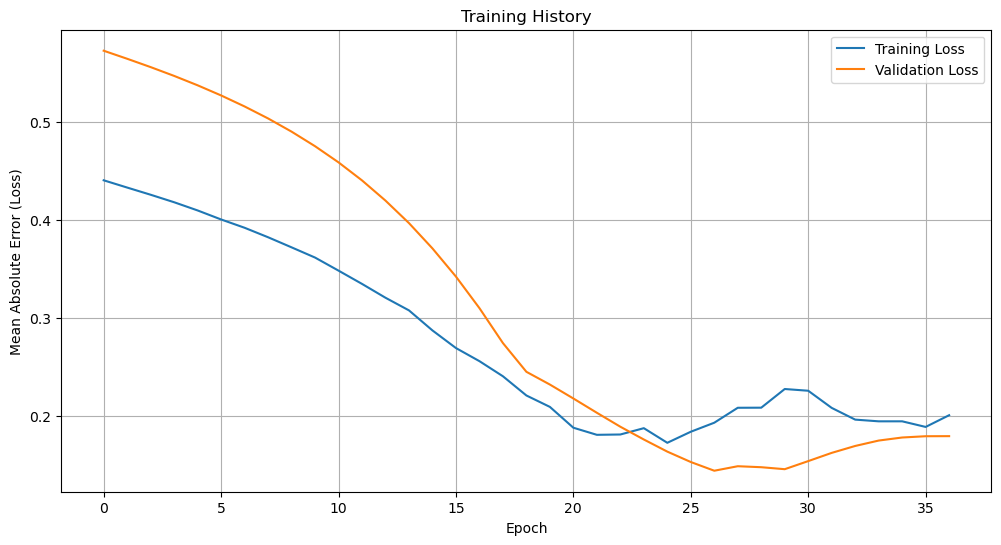

RMSE: 29.927486852903204
MAE: 28.65432923798494
MAPE: 10.506360845936653
MASE: 0.10104573932055677


In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Data Preprocessing
# Select specific region for prediction
selected_region_data = noise_data[noise_data['시군구'] == '강원특별자치도 강릉시 견소동']

# Using '면적당보증금' as target variable for prediction
values = selected_region_data['면적당보증금'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# Split data (90% training, 10% testing)
train_size = int(len(scaled) * 0.9)
train, test = scaled[:train_size, :], scaled[train_size:, :]

# Create dataset function
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Convert data to LSTM format
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM Model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(25))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# Training
early_stop = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1, shuffle=False, callbacks=[early_stop])

# Predict
y_pred = model.predict(X_test)

# Convert predictions back to normal values
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE, MAE, MAPE, MASE
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae = mean_absolute_error(y_test_original, y_pred_original)
mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100
mase = np.mean(np.abs((y_pred_original - y_test_original) / np.mean(y_test_original)))

# Plotting the training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (Loss)')
plt.title(f'Training History')
plt.legend()
plt.grid(True)
plt.show()

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"MASE: {mase}")


## xgb & RandomForestRegressor 성능평가

In [7]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

X_train_rf, y_train_rf = create_dataset(train)
X_test_rf, y_test_rf = create_dataset(test)

# RandomForestRegressor model training
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train_rf, y_train_rf)

# XGBoost model training
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train_rf, y_train_rf)

# Predict
y_pred_rf = rf_model.predict(X_test_rf)
y_pred_xgb = xgb_model.predict(X_test_rf)

# Convert predictions back to original values
y_pred_rf_original = scaler.inverse_transform(y_pred_rf.reshape(-1, 1))
y_pred_xgb_original = scaler.inverse_transform(y_pred_xgb.reshape(-1, 1))

# Calculate metrics for RandomForest
rmse_rf = np.sqrt(mean_squared_error(y_test_original, y_pred_rf_original))
mae_rf = mean_absolute_error(y_test_original, y_pred_rf_original)
mape_rf = np.mean(np.abs((y_test_original - y_pred_rf_original) / y_test_original)) * 100
mase_rf = np.mean(np.abs((y_pred_rf_original - y_test_original) / np.mean(y_test_original)))

# Calculate metrics for XGBoost
rmse_xgb = np.sqrt(mean_squared_error(y_test_original, y_pred_xgb_original))
mae_xgb = mean_absolute_error(y_test_original, y_pred_xgb_original)
mape_xgb = np.mean(np.abs((y_test_original - y_pred_xgb_original) / y_test_original)) * 100
mase_xgb = np.mean(np.abs((y_pred_xgb_original - y_test_original) / np.mean(y_test_original)))

(rmse_rf, mae_rf, mape_rf, mase_rf), (rmse_xgb, mae_xgb, mape_xgb, mase_xgb)
print("RandomForest")
print(f"RMSE: {rmse_rf}")
print(f"MAE: {mae_rf}")
print(f"MAPE: {mape_rf}")
print(f"MASE: {mase_rf}")
print("------------------")
print("XGBoost")
print(f"RMSE: {rmse_xgb}")
print(f"MAE: {mae_xgb}")
print(f"MAPE: {mape_xgb}")
print(f"MASE: {mase_xgb}")


RMSE: 42.57274770254653
MAE: 30.309771259803313
MAPE: 11.859996872313152
MASE: 0.10688343880420793
RMSE: 60.73599853755577
MAE: 41.13433011813299
MAPE: 16.251006348665108
MASE: 0.14505482797108002


## ARIMA 성능평가

In [12]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

# Set index to '계약년월'
data_arima = noise_data[['계약년월', '면적당보증금']].set_index('계약년월')
data_arima = data_arima[data_arima['시군구'] == '강원특별자치도 강릉시 견소동']
# Splitting data into train and test
train_size_arima = int(len(data_arima) * 0.9)
train_arima, test_arima = data_arima[:train_size_arima], data_arima[train_size_arima:]

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Find the best parameters
best_aic = np.inf
best_pdq = None
tmp_model = None
best_model = None

warnings.filterwarnings("ignore")  # ignore ARIMA warnings for now

# Iterate over combinations to find the best one
for param in pdq:
    try:
        tmp_model = ARIMA(train_arima, order=param)
        res = tmp_model.fit()
        if res.aic < best_aic:
            best_aic = res.aic
            best_pdq = param
            best_model = tmp_model
    except:
        continue

best_pdq


(2, 0, 2)

In [13]:
from sklearn.metrics import mean_absolute_error

# Train the best ARIMA model
model_arima = ARIMA(train_arima, order=best_pdq)
model_fit = model_arima.fit()

# Prediction
forecast = model_fit.forecast(steps=len(test_arima))

# Calculate RMSE, MAE, MAPE, MASE for ARIMA
rmse_arima = np.sqrt(mean_squared_error(test_arima, forecast))
mae_arima = mean_absolute_error(test_arima, forecast)
mape_arima = np.mean(np.abs((test_arima.values - forecast.values) / test_arima.values)) * 100
mase_arima = np.mean(np.abs((forecast.values - test_arima.values) / np.mean(test_arima.values)))

print(f"RMSE: {rmse_arima}")
print(f"MAE: {mae_arima}")
print(f"MAPE: {mape_arima}")
print(f"MASE: {mase_arima}")


RMSE: 163.06523192861357
MAE: 144.22415817011805
MAPE: 127.11346844026453
MASE: 0.7904579438942375
